# A basic example using *Limeade*

This notebook shows a basic example of using *Limeade* to generate molecules.

The required Python libraries used in this notebook are as follows:
- `Limeade`: the package this notebook demonstrates. It can encode molecule space with given requirements into mathematical equations and generate feasible solutions quickly.
- `rdkit`: used to plot generated molecules.

*Gurobi* is used to generate solutions. Please follow the instructions to obtain a [free academic license](https://www.gurobi.com/academia/academic-program-and-licenses/). 

In [1]:
from limeade import MIPMol
from rdkit import Chem

The minimal information needed by *Limeade* is:
- `N`: the number of atoms.
- `atoms`: the list of types of atom.

In [2]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-11


To control the composition of molecules, *Limeade* also provides the following options:
- `Mol.bounds_atoms`: bound the number of each type of atom.
- `Mol.bounds_double_bonds`: bound the number of double bonds.
- `Mol.bounds_triple_bonds`: bound the number of triple bonds.
- `Mol.bounds_rings`: bound the number of rings.

In [3]:
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)

# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

After the aforementioned settings, one can already solve the model and get generated molecules. *Limeade* uses batch-based generation to (i) let the generation time grows linearly as the number of solutions needed, and (ii) increase the diversity of generated molecules.

There are three parameters in `Mol.solve`:
- `NumSolutions`: the number of generated molecules.
- `BatchSize`: the size of each batch, the default value is 100.
- `TimeLimit`: the time limit for generation time of each batch, the default value is 100.

Usually, the users just need to set the `NumSolutions` parameter, for example:

In [4]:
mols = Mol.solve(NumSolutions=1000)

  0%|          | 0/10 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


1000 molecules are generated after 0.77 seconds.
There are 837 molecules left after removing symmetric and invalid molecules.


Plot the first 20 molecules for visualization:

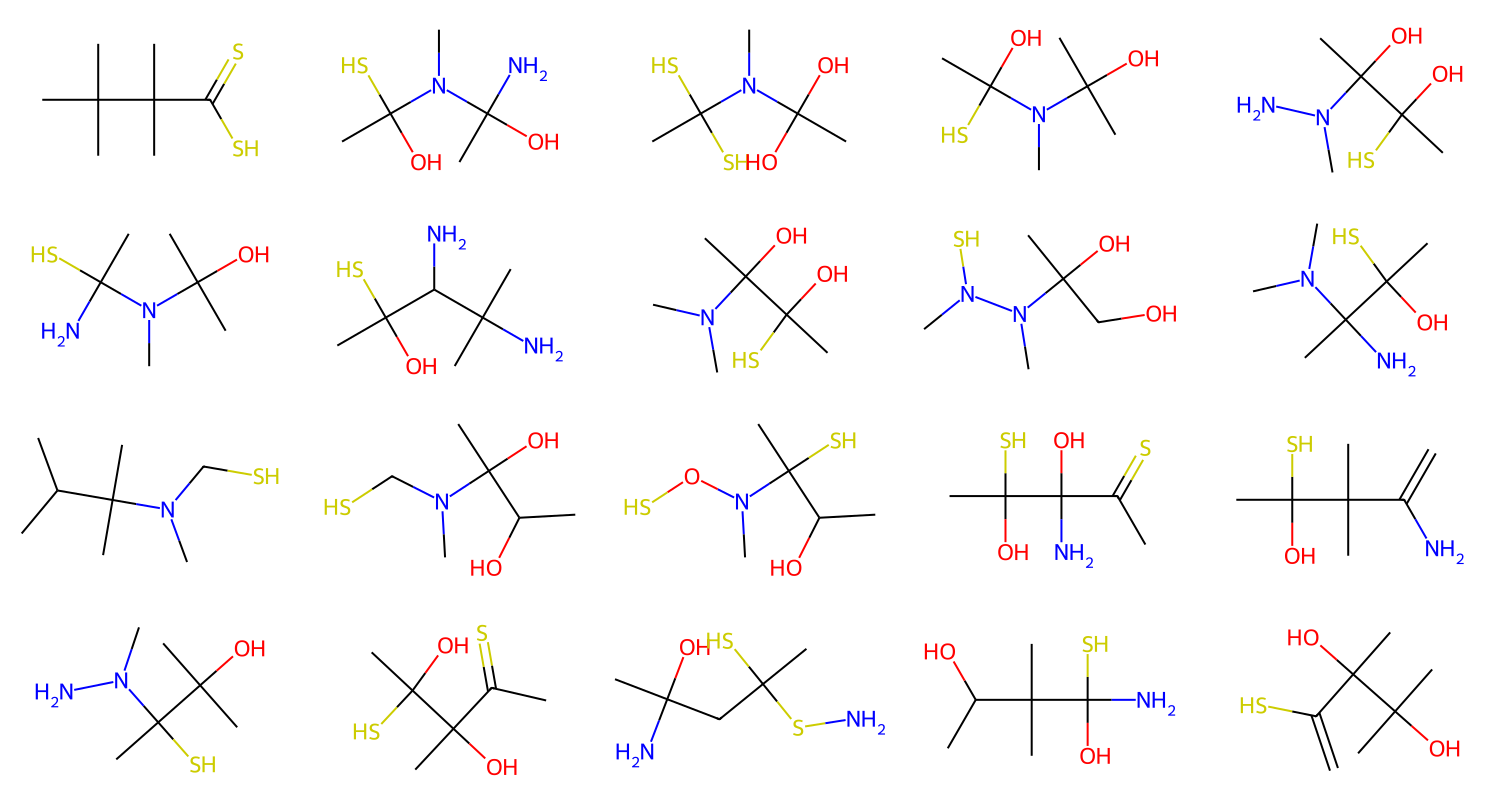

In [5]:
Chem.Draw.MolsToGridImage([mols[i] for i in range(20)], subImgSize=(300, 200), molsPerRow=5)